# Preprocessing Data

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import warnings
warnings.filterwarnings('ignore')

In [62]:
data = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [63]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#  Data Exploration

In [64]:
data.shape

(301, 9)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
data.select_dtypes(include = 'object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

# Statistical Summary

In [67]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [68]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [69]:
data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [70]:
len(data.columns[data.isnull().any()])

0

In [71]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [72]:
data = data.drop(columns='Car_Name', axis=1)

In [73]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 # Categorical values

In [74]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [75]:
data['Seller_Type'] = [1 if x == 'Dealer' else 0 for x in data['Seller_Type']]

In [76]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [77]:
data['Transmission'] = [1 if x == 'Manual' else 0 for x in data['Transmission']]

In [78]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [79]:
def fuelchange(fuel):
    if fuel=='Petrol':
        return 1
    elif fuel=='Diesel':
        return 2
    else:
        return 3

In [80]:
data['Fuel_Final'] = data['Fuel_Type'].apply(fuelchange)

In [81]:
data = data.drop(columns='Fuel_Type', axis=1)

In [82]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Final
0,2014,3.35,5.59,27000,1,1,0,1
1,2013,4.75,9.54,43000,1,1,0,2
2,2017,7.25,9.85,6900,1,1,0,1
3,2011,2.85,4.15,5200,1,1,0,1
4,2014,4.60,6.87,42450,1,1,0,2


In [83]:
data.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [84]:
pd.get_dummies(data=data, drop_first= True)

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Final
0,2014,3.35,5.59,27000,1,1,0,1
1,2013,4.75,9.54,43000,1,1,0,2
2,2017,7.25,9.85,6900,1,1,0,1
3,2011,2.85,4.15,5200,1,1,0,1
4,2014,4.60,6.87,42450,1,1,0,2
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,2
297,2015,4.00,5.90,60000,1,1,0,1
298,2009,3.35,11.00,87934,1,1,0,1
299,2017,11.50,12.50,9000,1,1,0,2


# Preprocessing the data

In [85]:
data.duplicated().sum()

2

In [86]:
data[data.duplicated()]

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Final
17,2016,7.75,10.79,43000,1,1,0,2
93,2015,23.00,30.61,40000,1,0,0,2


In [87]:
data['Owner'].unique()

array([0, 1, 3])

In [88]:
corr_mat = data.corr()

In [89]:
corr_mat

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_Final
Year,1.000000,0.236141,-0.047584,-0.524342,0.039896,0.000394,-0.182104,0.053643
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.550724,-0.367128,-0.088344,0.509467
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.512030,-0.348715,0.008057,0.440415
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.101419,-0.162510,0.089216,0.166801
Seller_Type,0.039896,0.550724,0.512030,0.101419,1.000000,-0.063240,-0.124269,0.352415
Transmission,0.000394,-0.367128,-0.348715,-0.162510,-0.063240,1.000000,-0.050316,-0.080466
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.124269,-0.050316,1.000000,-0.055705
Fuel_Final,0.053643,0.509467,0.440415,0.166801,0.352415,-0.080466,-0.055705,1.000000


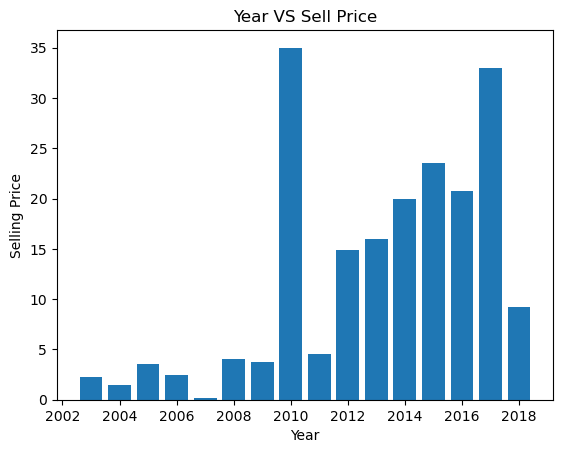

In [90]:
plt.bar(data['Year'], data['Selling_Price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year VS Sell Price')
plt.show()

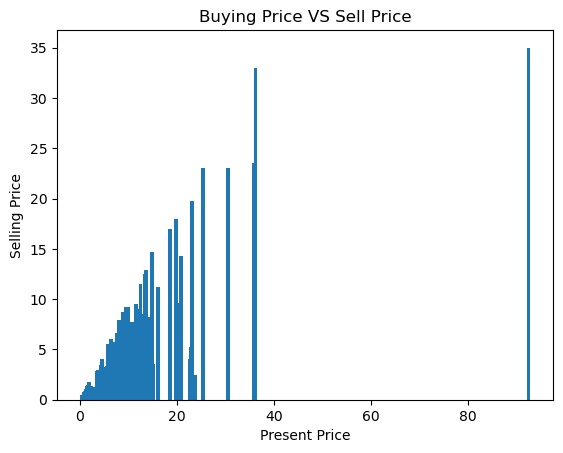

In [140]:
plt.bar(data['Present_Price'], data['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Buying Price VS Sell Price')
plt.show()

In [92]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Seller_Type',
       'Transmission', 'Owner', 'Fuel_Final'],
      dtype='object')

# Heatmap

In [93]:
corr=data.corr()

<AxesSubplot:>

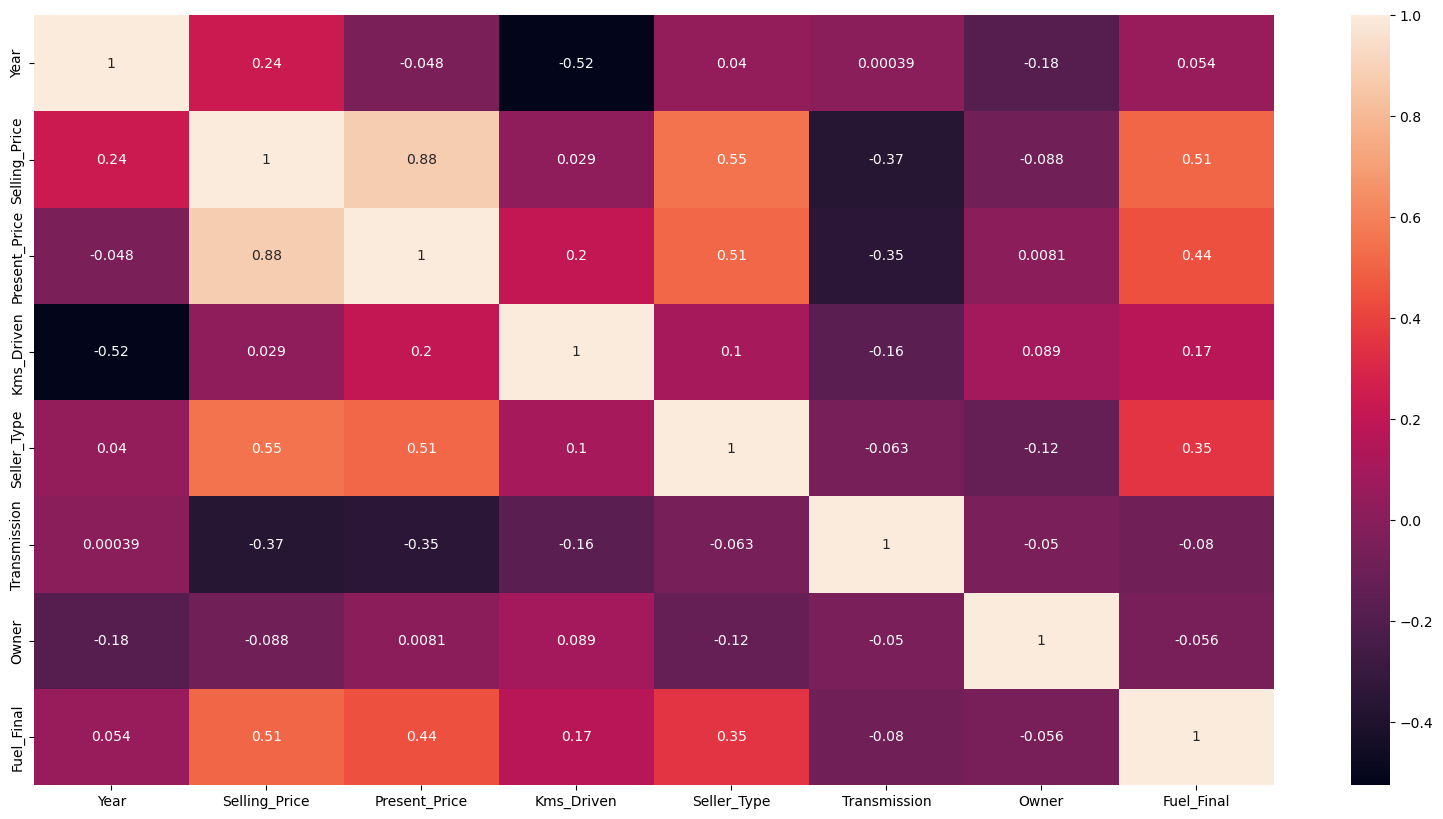

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

# Featuring Scaling

In [95]:
X = data.drop(columns='Selling_Price', axis=1)
Y = data['Selling_Price']

# Train Test Split

In [96]:
x=data.iloc[:,1:-1].values

In [97]:
x.shape

(301, 6)

In [98]:
y=data.iloc[:,-1].values

In [99]:
y.shape

(301,)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [102]:
X_test.shape, X_train.shape

((61, 7), (240, 7))

In [103]:
Y_test.shape, Y_train.shape

((61,), (240,))

# **Feature Scaling**

In [104]:
from sklearn.preprocessing import StandardScaler


In [105]:
sc= StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [106]:
X_train

array([[ 0.14709233,  0.1466226 ,  1.05706025, ...,  0.37073003,
        -0.1393466 ,  1.88024551],
       [-0.53179535, -0.35552552, -0.3529268 , ...,  0.37073003,
        -0.1393466 , -0.48236665],
       [ 1.16542386,  3.19298791, -0.77406088, ..., -2.69738059,
        -0.1393466 ,  1.88024551],
       ...,
       [ 0.48653618, -0.63784436, -0.58381453, ...,  0.37073003,
        -0.1393466 , -0.48236665],
       [-2.56845841, -0.3867703 ,  0.62900596, ...,  0.37073003,
        -0.1393466 , -0.48236665],
       [ 0.14709233, -0.77844584, -0.59094876, ...,  0.37073003,
        -0.1393466 , -0.48236665]])

In [107]:
X_test

array([[ 0.48653618,  0.19906919,  0.54294327,  0.7540739 ,  0.37073003,
        -0.1393466 ,  1.88024551],
       [-0.8712392 , -0.75769038, -0.77406088, -1.32612997,  0.37073003,
        -0.1393466 , -0.48236665],
       [ 0.48653618, -0.21380816, -0.32988321,  0.7540739 ,  0.37073003,
        -0.1393466 , -0.48236665],
       [ 0.82598002,  0.44456383, -0.10848402,  0.7540739 ,  0.37073003,
        -0.1393466 ,  1.88024551],
       [ 1.16542386,  1.35624165, -0.56003373,  0.7540739 , -2.69738059,
        -0.1393466 ,  1.88024551],
       [ 0.82598002, -0.18367928, -0.78357319,  0.7540739 ,  0.37073003,
        -0.1393466 , -0.48236665],
       [-0.53179535, -0.09217673, -0.08441785,  0.7540739 ,  0.37073003,
        -0.1393466 , -0.48236665],
       [ 0.82598002, -0.7884888 , -0.89296485, -1.32612997,  0.37073003,
        -0.1393466 , -0.48236665],
       [-0.19235151, -0.09217673, -0.15576024,  0.7540739 , -2.69738059,
        -0.1393466 , -0.48236665],
       [-0.53179535,  0.1990

# 1st Model Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [110]:
Y_pred = model.predict(X_test)

In [111]:
model.score(X_test,Y_test)

0.9134181721224686

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
mse = mean_squared_error(Y_test, Y_pred)


In [114]:
mse



2.1885564456572375

In [115]:
coe=r2_score(Y_test,Y_pred)*100
print("Coefficient of determination: %.2f" % r2_score(Y_test,Y_pred))


Coefficient of determination: 0.91


In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, cv=10)
scores

array([0.77580903, 0.63023388, 0.87912501, 0.77928562, 0.82931344,
       0.82854626, 0.0826336 , 0.86463104, 0.94033201, 0.81570374])

In [117]:
acc1=scores.mean()*100
print ("Accuracy is {:.2f}% " .format(scores.mean()*100))

Accuracy is 74.26% 


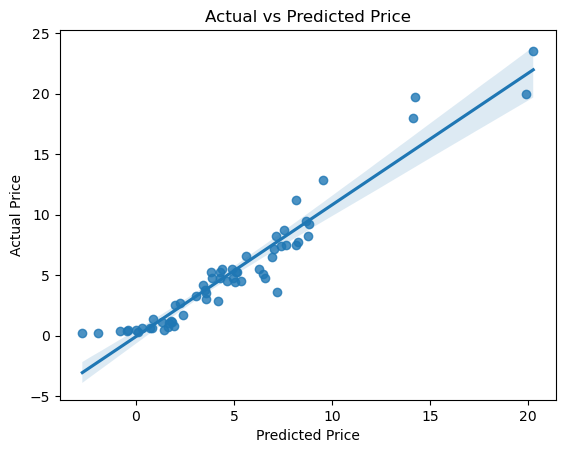

In [118]:
sns.regplot(x=Y_pred, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

# 2nd Model Random Forest

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
mod = RandomForestRegressor()
mod.fit(X_train, Y_train)

RandomForestRegressor()

In [121]:
y_pred1 = mod.predict(X_test)

In [122]:
mod.score(X_test,Y_test)

0.9595233700978228

In [123]:
mse1 = mean_squared_error(Y_test, y_pred1)

In [124]:
mse1

1.023140668688523

In [125]:
coe2=r2_score(Y_test,y_pred1)*100
print("Coefficient of determination: %.2f" % r2_score(Y_test,y_pred1))


Coefficient of determination: 0.96


In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mod, X_train, Y_train, cv=10)
scores

array([0.85707985, 0.95638049, 0.96597336, 0.94381972, 0.84683255,
       0.99235254, 0.7495599 , 0.94437331, 0.98136357, 0.97159231])

In [127]:
acc2=scores.mean()*100
print ("Accuracy is {:.2f}% " .format(scores.mean()*100))

Accuracy is 92.09% 


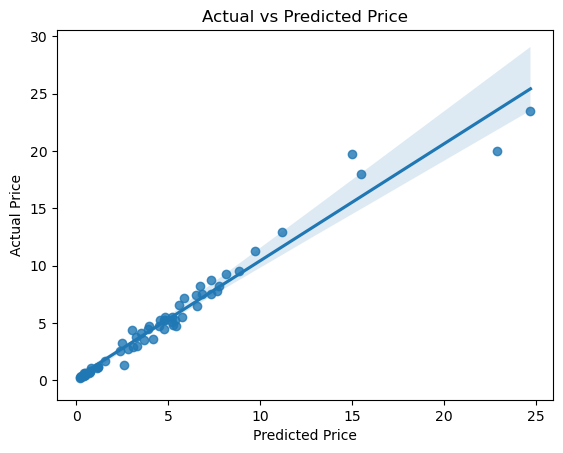

In [128]:
sns.regplot(x=y_pred1, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

# 3rd Model XG Boost

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

In [130]:
model1 = GradientBoostingRegressor()
model1.fit(X_train, Y_train)

GradientBoostingRegressor()

In [131]:
y_pred3 = model1.predict(X_test)

In [132]:
model1.score(X_test,Y_test)

0.9623579022693126

In [133]:
mse2 = mean_squared_error(Y_test, y_pred3)
mse2

0.9514912959920784

In [134]:
coe3= r2_score(Y_test,y_pred3)*100

print("Coefficient of determination: %.2f" % r2_score(Y_test,y_pred3))


Coefficient of determination: 0.96


In [135]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, Y_train, cv=10)
scores

array([0.87442491, 0.92282836, 0.95419451, 0.97152191, 0.8254456 ,
       0.99273259, 0.82794902, 0.96827186, 0.98118208, 0.98204024])

In [136]:
acc3=scores.mean()*100
print ("Accuracy is {:.2f}% " .format(scores.mean()*100))

Accuracy is 93.01% 


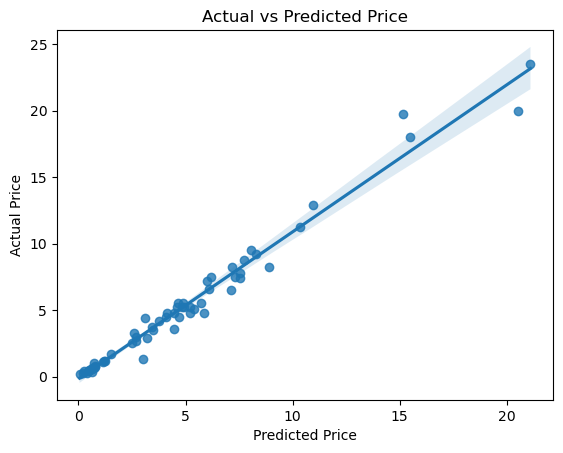

In [137]:
sns.regplot(x=y_pred3, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Choosing the final model

In [138]:
final_data = pd.DataFrame({'Models':['Linear Regression', 'Random Forest', 'XG Boost'], 'Coe':[coe, coe2, coe3],'ACC':[acc1, acc2, acc3]})

In [139]:
final_data

,Models,Coe,ACC
0,Linear Regression,91.341817,74.256136
1,Random Forest,95.952337,92.093276
2,XG Boost,96.235790,93.005911
